In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
DATA_IN_PATH = r'/data_in/'

train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
print("파일의 크기 : ")

for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일의 크기 : 
sample_submission.csv         22.35MB
test.csv                      314.02MB
train.csv                     63.4MB


In [0]:
print("전체 학습 데이터의 개수 : {}".format(len(train_data)))

전체 학습 데이터의 개수 : 404290


In [0]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [0]:
print("교육 데이터의 총 질문 수 : {}".format(len(np.unique(train_set))))
print("반복해서 나타나는 질문의 수 : {}".format(np.sum(train_set.value_counts()>1)))

교육 데이터의 총 질문 수 : 537361
반복해서 나타나는 질문의 수 : 111873


Text(0, 0.5, 'Number of questions')

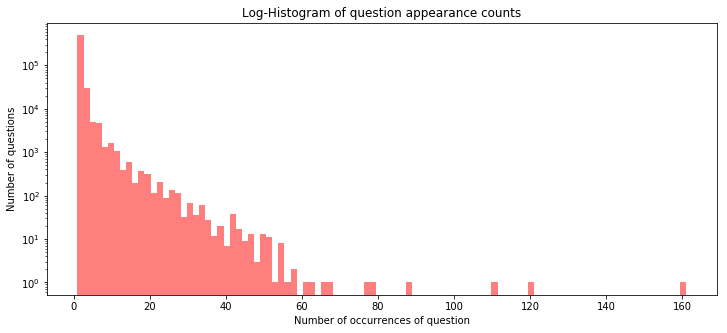

In [0]:
plt.figure(figsize=(12, 5))

plt.hist(train_set.value_counts(), bins=100, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')

In [0]:
train_set.value_counts().describe()

count    537361.000000
mean          1.504724
std           1.911439
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         161.000000
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xc2a1ef0>,
 'caps': [<matplotlib.lines.Line2D at 0xc2a65c0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc2a1ac8>],
 'medians': [<matplotlib.lines.Line2D at 0xc2a6c50>],
 'fliers': [<matplotlib.lines.Line2D at 0xc28a320>],
 'means': [<matplotlib.lines.Line2D at 0xc2a6f98>]}

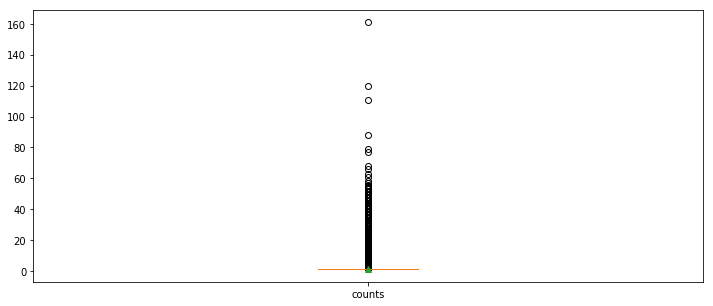

In [0]:
plt.figure(figsize=(12, 5))
plt.boxplot([train_set.value_counts()], labels=['counts'], showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

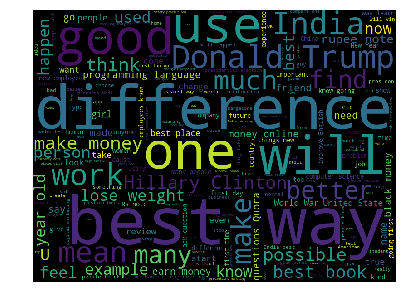

In [0]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis('off')

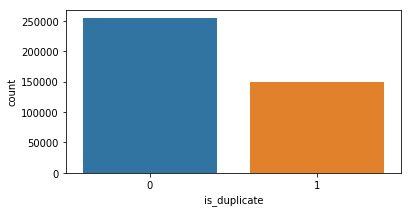

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.countplot(train_data['is_duplicate'])

In [0]:
train_length = train_set.apply(len)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Probability')

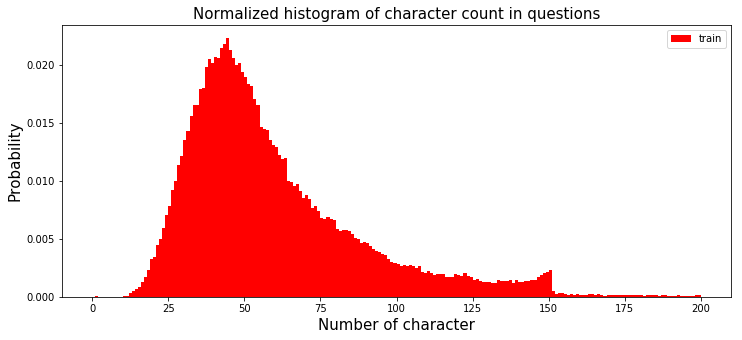

In [0]:
plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, range=[0,200], color='r', normed=True, label='train')
plt.title('Normalized histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of character', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [0]:
train_length.describe()

count    808580.000000
mean         59.822548
std          31.963751
min           1.000000
25%          39.000000
50%          51.000000
75%          72.000000
max        1169.000000
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1c343e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1c342550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c343a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1c342be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c342fd0>],
 'means': [<matplotlib.lines.Line2D at 0x1c342f28>]}

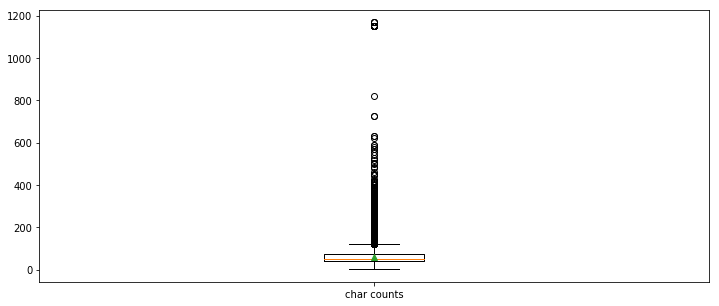

In [0]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, labels=['char counts'], showmeans=True)

In [0]:
train_word_counts = train_set.apply(lambda x: len(x.split(' ')))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Probability')

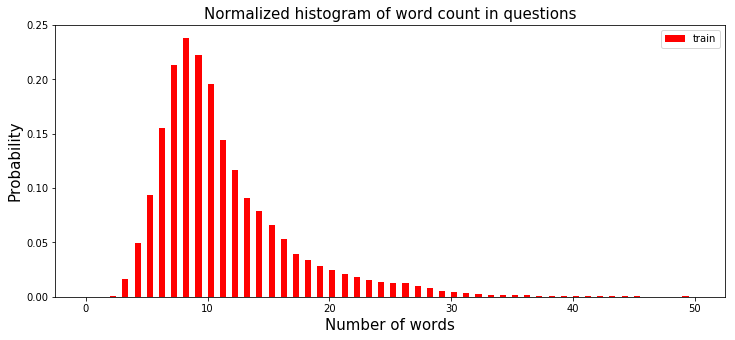

In [0]:
plt.figure(figsize=(12, 5))
plt.hist(train_word_counts, bins=100, range=[0,50], color='r', normed=True, label='train')
plt.title('Normalized histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [0]:
train_word_counts.describe()

count    808580.000000
mean         11.064856
std           5.889168
min           1.000000
25%           7.000000
50%          10.000000
75%          13.000000
max         237.000000
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb71e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1b955518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb71a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1b955ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b955f98>],
 'means': [<matplotlib.lines.Line2D at 0x1b955ef0>]}

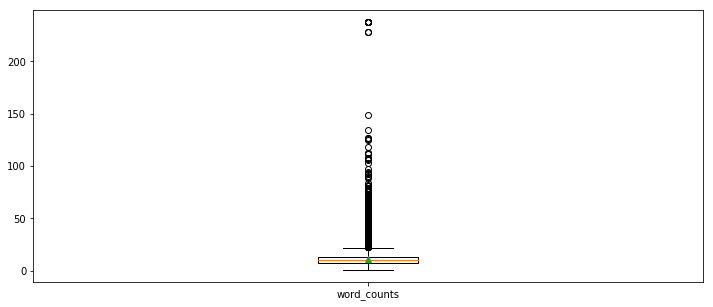

In [0]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_word_counts, labels=['word_counts'], showmeans=True)

In [0]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x))
math = np.mean(train_set.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_set.apply(lambda x: '.' in x))
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x])))

print("물음표가 있는 질문: {:.2f}%".format(qmarks * 100))
print("수학 태그가 있는 질문: {:.2f}%".format(math * 100))
print("마침표가 있는 질문: {:.2f}%".format(fullstop * 100))
print("첫 글자가 대문자인 질문: {:.2f}%".format(capital_first * 100))
print("대문자가 있는 질문: {:.2f}%".format(capitals * 100))
print("숫자가 있는 질문: {:.2f}%".format(numbers * 100))

물음표가 있는 질문: 99.87%
수학 태그가 있는 질문: 0.12%
마침표가 있는 질문: 6.31%
첫 글자가 대문자인 질문: 99.81%
대문자가 있는 질문: 99.95%
숫자가 있는 질문: 11.83%
